<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задания" data-toc-modified-id="Описание-задания-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задания</a></span></li><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Приведение-данных-в-табличный-вид" data-toc-modified-id="Приведение-данных-в-табличный-вид-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приведение данных в табличный вид</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><span><a href="#Первое-задание" data-toc-modified-id="Первое-задание-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первое задание</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-продаж-каждого-товара-за-каждый-месяц" data-toc-modified-id="Общая-сумма-продаж-каждого-товара-за-каждый-месяц-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая сумма продаж каждого товара за каждый месяц</a></span></li><li><span><a href="#Среднее-количество-продаж-каждого-товара-в-каждом-месяце." data-toc-modified-id="Среднее-количество-продаж-каждого-товара-в-каждом-месяце.-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Среднее количество продаж каждого товара в каждом месяце.</a></span></li><li><span><a href="#Топ-5-товаров-с-наибольшим-количеством-продаж." data-toc-modified-id="Топ-5-товаров-с-наибольшим-количеством-продаж.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Топ-5 товаров с наибольшим количеством продаж.</a></span></li></ul></li><li><span><a href="#Второе-задание" data-toc-modified-id="Второе-задание-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Второе задание</a></span></li><li><span><a href="#Третье-задание" data-toc-modified-id="Третье-задание-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Третье задание</a></span></li></ul></li></ul></div>

## Описание задания

Задача : Анализ данных по продажам и прогнозирование

Вы получили набор данных о продажах в компании (файл «Продажи) и вам нужно выполнить анализ данных, чтобы выявить следующую информацию:

1. Вам нужно написать программу на Python, которая будет читать данные из файла и выполнять необходимые вычисления. В результате программа должна выводить результаты анализа данных. Формат вывода на каждый пункт- свободный ((не пренебрегайте наглядностью, это важно):
- Общая сумма продаж каждого товара за каждый месяц.
- Среднее количество продаж каждого товара в каждом месяце.
- Топ-5 товаров с наибольшим количеством продаж.

2. Постройте гистограмму распределения количества продаж по месяцам для самого доходного товара и график общей суммы продаж по месяцам для него же. Не пренебрегайте оформлением.

3. Постройте модель прогнозирования количества продаж для любого товара (на выбор) на 1 год вперед. Опирайтесь только на исторические данные, предоставленные в файле. Любые внешние дополнительно внесенные данные должны быть обоснованы.


## Импорт библиотек и загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import datetime

from itertools import product
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

import warnings

In [2]:
data = pd.read_excel("Z:\DIR_ПОЛЬЗОВАТЕЛИ\Laletin\Documents\work\База\База тест\Продажи.xlsx", header=None)

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,NaN,NaN,2022 год,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Товар,NaN,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,...,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
2,Фен,"Цена, шт.",5503,4300,5985,4205,5336,4974,5624,4587,...,6691,5647,8631,9891,8739,5727,8005,9755,7077,9956
3,NaN,Кол-во проданных штук,58,78,14,64,66,37,98,46,...,36,10,33,37,48,37,26,50,44,41
4,Телевизор,"Цена, шт.",9552,42671,142664,108756,97523,9062,24695,134392,...,10192,25301,47962,28530,33501,13199,12340,41914,41056,13895


## Приведение данных в табличный вид

In [4]:
# создадим два пустых датасета, один - основной, второй - вспомогательный
df = pd.DataFrame()
df2 = pd.DataFrame()

In [5]:
# напишем цикл который проходится по 2022 году с января по декабрь
for cnt in range(2, 14):
    #товар
    list_of_goods = data[0].dropna().to_list()
    list_of_goods = list_of_goods[1:]
    df2['goods'] = list_of_goods
    # цена
    list_of_prices = data[cnt].to_list()
    list_of_prices = list_of_prices[2:]
    list_of_prices = list_of_prices[::2]
    df2['price'] = list_of_prices
    # количество
    list_of_qty = data[cnt].to_list()
    list_of_qty = list_of_qty[2:]
    list_of_qty = list_of_qty[1::2]
    df2['qty'] = list_of_qty
    # месяц
    df2['month'] = cnt - 1
    # год
    df2['year'] = 2022
    # сохраняем
    df = pd.concat([df, df2])

In [6]:
# проверим наши данные
df

,goods,price,qty,month,year
0,Фен,5503,58,1,2022
1,Телевизор,9552,36,1,2022
2,Микроволновая печь,6108,65,1,2022
3,Утюг,5201,54,1,2022
4,Стиральная машина,10856,45,1,2022
...,...,...,...,...,...
8,Кофемолка,3076,53,12,2022
9,Блендер,8230,48,12,2022
10,Игровая приставка,114898,23,12,2022
11,Электронные часы,4468,54,12,2022


In [7]:
# через 2 ячейки начинается 2021 год, то есть в столбце № 15
# напишем цикл который проходится по 2021 году с января по декабрь
for cnt in range(15, 27):
    #товар
    list_of_goods = data[0].dropna().to_list()
    list_of_goods = list_of_goods[1:]
    df2['goods'] = list_of_goods
    # цена
    list_of_prices = data[cnt].to_list()
    list_of_prices = list_of_prices[2:]
    list_of_prices = list_of_prices[::2]
    df2['price'] = list_of_prices
    # количество
    list_of_qty = data[cnt].to_list()
    list_of_qty = list_of_qty[2:]
    list_of_qty = list_of_qty[1::2]
    df2['qty'] = list_of_qty
    # месяц
    df2['month'] = cnt - 14
    # год
    df2['year'] = 2021
    # сохраняем
    df = pd.concat([df, df2])

In [8]:
# через 2 ячейки начинается 2020 год, то есть в столбце № 28
# напишем цикл который проходится по 2020 году с января по декабрь
for cnt in range(28, 40):
    #товар
    list_of_goods = data[0].dropna().to_list()
    list_of_goods = list_of_goods[1:]
    df2['goods'] = list_of_goods
    # цена
    list_of_prices = data[cnt].to_list()
    list_of_prices = list_of_prices[2:]
    list_of_prices = list_of_prices[::2]
    df2['price'] = list_of_prices
    # количество
    list_of_qty = data[cnt].to_list()
    list_of_qty = list_of_qty[2:]
    list_of_qty = list_of_qty[1::2]
    df2['qty'] = list_of_qty
    # месяц
    df2['month'] = cnt - 27
    # год
    df2['year'] = 2020
    # сохраняем
    df = pd.concat([df, df2])

In [9]:
df

,goods,price,qty,month,year
0,Фен,5503,58,1,2022
1,Телевизор,9552,36,1,2022
2,Микроволновая печь,6108,65,1,2022
3,Утюг,5201,54,1,2022
4,Стиральная машина,10856,45,1,2022
...,...,...,...,...,...
8,Кофемолка,4954,30,12,2020
9,Блендер,8985,18,12,2020
10,Игровая приставка,118438,39,12,2020
11,Электронные часы,4468,54,12,2020


Для проверки: у нас 13 наименований товаров, и 3 года по 12 месяцев.
Итого: 13 * 3 * 12 = 468

Теперь данные в табличном виде, можно приступать к работе.

## Задание

### Первое задание

1. Вам нужно написать программу на Python, которая будет читать данные из файла и выполнять необходимые вычисления. В результате программа должна выводить результаты анализа данных. Формат вывода на каждый пункт- свободный ((не пренебрегайте наглядностью, это важно):
- Общая сумма продаж каждого товара за каждый месяц.
- Среднее количество продаж каждого товара в каждом месяце.
- Топ-5 товаров с наибольшим количеством продаж.

#### Общая сумма продаж каждого товара за каждый месяц

In [10]:
# продажи за каждый месяц каждого года
df['total_sales'] = df['price'] * df['qty']

In [11]:
# сводная таблица
sales_pivot = df.pivot_table(
    index='goods',
    columns=[ 'year', 'month'],
    values='total_sales'
)
# транспонируем
sales_pivot = sales_pivot.T
# выводим результат
sales_pivot

goods       Блендер  Игровая приставка  Кофемолка  Кухонный комбайн  \
year month                                                            
2020 1       642624            4428824     318272            134550   
     2       184737            7283072     234248            391680   
     3       665820            4912581      85460            261120   
     4       249568            2986900      95004            145360   
     5       191328            3196170     214337            269240   
     6       310024            6509685     178892            377026   
     7       312532            7951745     224136            308868   
     8       607905            8975448     357880            317718   
     9       210860            3005244     180082            587295   
     10      323235            7569590     259817            221280   
     11      388422            4834700      87928            421146   
     12      161730            4619082     148620            277248   
2021 1       212472            1011892     186144            554313   
     2       310206            3888610     146580            215275   
     3       441283            2015650     298272            172007   
     4       125088            6436492      70114            335520   
     5       570988            7032735     314301            301350   
     6       454038            1686576     197760            350140   
     7       167865            5007330     172430            322480   
     8       319734            1518210     153069             93646   
     9       311634            6450416     278476            204510   
     10      257516            3192288     394704            130580   
     11      413670            3815091     127585            300624   
     12       82880            6956517     179544            176820   
2022 1       451192            3693648     241984           1841100   
     2       271552            6893712     302842            261630   
     3       504968            5826964     191160           1103175   
     4       159562             999432     215989            785970   
     5       292600            2800986     648956            596232   
     6       297134             667620     617308            893520   
     7       175550            2291800     110773            104273   
     8       160416            6687392     875760            447048   
     9       370714            2653312     338216            941876   
     10      214305            8618496     356174            234201   
     11      118071            1427162      85580            725676   
     12      395040            2642654     163028           1830270   

goods       Микроволновая печь   Ноутбук  Стиральная машина  Телевизор  \
year month                                                               
2020 1                  220347    409853            1258500    1782557   
     2                  276862  15728832             398774    1176916   
     3                  313575   8991270            1251354     132496   
     4                   73728   4655808            1850310     404816   
     5                  259164    213612            1071048    1486822   
     6                  215825   3699256            1274692     912960   
     7                  221060         0             910668    1206036   
     8                  299277   7487480            2509000     488363   
     9                  120510   3956940            1924132     320840   
     10                 350702   9704684            1869087    1508904   
     11                  55580   4247614            3160421    1067456   
     12                 191730   1729260            1253248     666960   
2021 1                  256380    409853            1906758    1772430   
     2                  173838  15728832            2261449    1841105   
     3                  344050   8991270             482763     991900   
     4                  236061   4655808   

#### Среднее количество продаж каждого товара в каждом месяце.

In [12]:
# сводная таблица
mean_sales_pivot = df.pivot_table(
    index='goods',
    columns='month',
    values='qty',
    aggfunc='mean'
)
# транспонируем
mean_sales_pivot = mean_sales_pivot.T
# выводим результат
mean_sales_pivot

goods,Блендер,Игровая приставка,Кофемолка,Кухонный комбайн,Микроволновая печь,Ноутбук,Стиральная машина,Телевизор,Утюг,Фен,Холодильник,Электронные часы,Электроплита
month,,,,,,,,,,,,,
1,61.666667,36.000000,50.000000,47.666667,40.666667,17.0,39.000000,39.333333,39.000000,36.000000,45.666667,7.0,27.000000
2,25.666667,36.333333,38.333333,28.333333,44.000000,94.0,23.000000,35.666667,28.333333,33.666667,25.333333,79.0,50.333333
3,55.000000,39.333333,29.333333,44.666667,29.666667,54.0,26.000000,23.666667,46.000000,20.000000,24.333333,42.0,36.333333
4,27.333333,38.333333,27.666667,36.333333,30.333333,36.0,44.333333,10.666667,34.666667,31.333333,28.333333,15.0,24.333333
5,54.666667,43.666667,49.333333,46.333333,21.666667,4.0,29.000000,44.333333,28.333333,47.666667,41.333333,23.0,38.666667
6,39.666667,27.000000,51.666667,34.000000,23.000000,44.0,48.333333,35.333333,49.666667,28.666667,54.000000,3.0,31.666667
7,29.000000,30.666667,26.666667,31.666667,22.000000,0.0,23.000000,52.666667,25.000000,56.000000,40.000000,36.0,30.666667
8,41.333333,45.333333,52.000000,45.333333,20.666667,68.0,18.000000,46.333333,28.666667,38.333333,36.666667,29.0,49.000000
9,31.000000,31.000000,49.666667,46.000000,27.000000,95.0,19.333333,44.333333,27.666667,31.666667,42.333333,40.0,50.666667


#### Топ-5 товаров с наибольшим количеством продаж.

Наибольший объем продаж (в рублях)

In [13]:
# наибольший объем продаж
top_5_pivot = (
    df
    .groupby('goods')
    .agg({'total_sales': 'sum'})
    .sort_values(by='total_sales', ascending=False)
    .head(5)
)
top_5_pivot

,total_sales
goods,
Ноутбук,182473827
Игровая приставка,160488026
Электроплита,144620759
Холодильник,123196696
Телевизор,58697455


Наибольшее количество продаж (в проданных штуках)

In [14]:
# наибольшее количество продаж
top_5_pivot_2 = (
    df
    .groupby('goods')
    .agg({'qty': 'sum'})
    .sort_values(by='qty', ascending=False)
    .head(5)
)
top_5_pivot_2

,qty
goods,
Ноутбук,1770
Кофемолка,1417
Фен,1393
Кухонный комбайн,1382
Блендер,1378


### Второе задание
2. Постройте гистограмму распределения количества продаж по месяцам для самого доходного товара и график общей суммы продаж по месяцам для него же. Не пренебрегайте оформлением.

In [15]:
# сделаем датасет только с самым доходным товаром
notebook_df = df[df['goods'] == 'Ноутбук']

In [16]:
#сделаем вспомогательные переменные для каждого года
notebook_df_2020 = notebook_df[notebook_df['year'] == 2020]
notebook_df_2021 = notebook_df[notebook_df['year'] == 2021]
notebook_df_2022 = notebook_df[notebook_df['year'] == 2022]

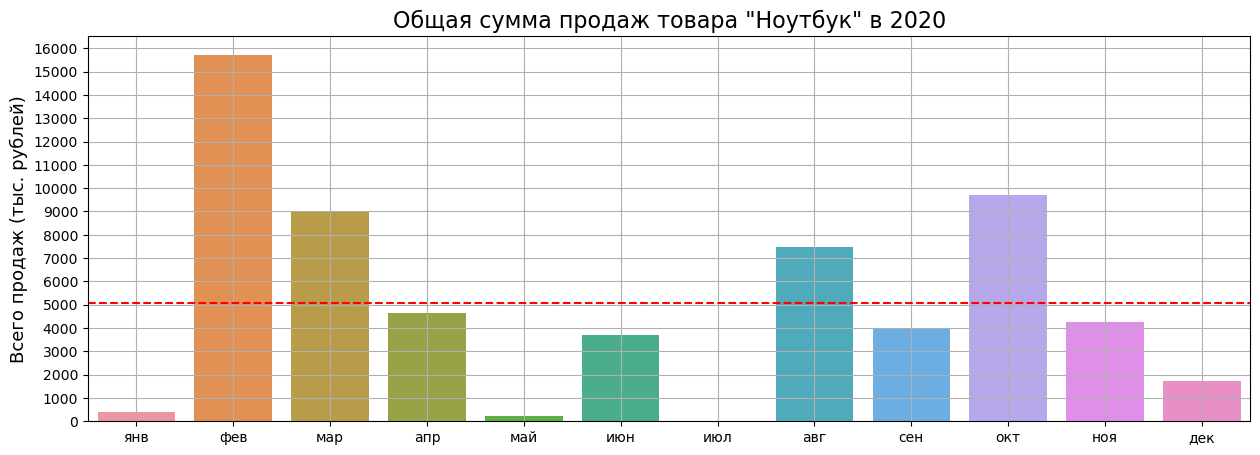

In [17]:
# рисуем столбчатый график с общей суммой продаж
fig, ax = plt.subplots()
sns.barplot(data=notebook_df_2020, y=notebook_df_2020.total_sales / 1000, x=notebook_df_2020.month)
# подписи по X
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(which='major') # сетка
# подписи месяцев
ax.set(xticklabels=['янв', 'фев', 'мар', "апр", "май", "июн", 
                    "июл", "авг", "сен", "окт", "ноя", "дек"])
# размеры рисунка
fig.set_figwidth(15) 
fig.set_figheight(5)
# подписи рисунка
plt.title('Общая сумма продаж товара "Ноутбук" в 2020', fontsize=16) 
plt.ylabel('Всего продаж (тыс. рублей)', fontsize=13)
plt.xlabel('')
# среднее
plt.axhline(y=notebook_df.total_sales.mean() / 1000, color='r', linestyle='--')
plt.show()

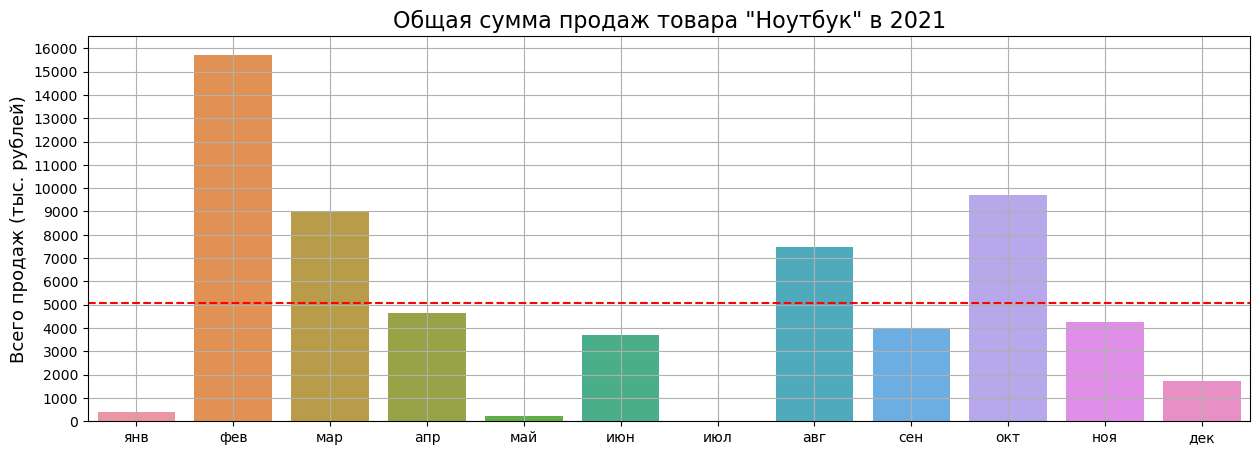

In [18]:
# рисуем столбчатый график с общей суммой продаж
fig, ax = plt.subplots()
sns.barplot(data=notebook_df_2021, y=notebook_df_2021.total_sales / 1000, x=notebook_df_2021.month)
# подписи по X
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(which='major') # сетка
# подписи месяцев
ax.set(xticklabels=['янв', 'фев', 'мар', "апр", "май", "июн", 
                    "июл", "авг", "сен", "окт", "ноя", "дек"])
# размеры рисунка
fig.set_figwidth(15) 
fig.set_figheight(5)
# подписи рисунка
plt.title('Общая сумма продаж товара "Ноутбук" в 2021', fontsize=16) 
plt.ylabel('Всего продаж (тыс. рублей)', fontsize=13)
plt.xlabel('')
# среднее
plt.axhline(y=notebook_df.total_sales.mean() / 1000, color='r', linestyle='--')
plt.show()

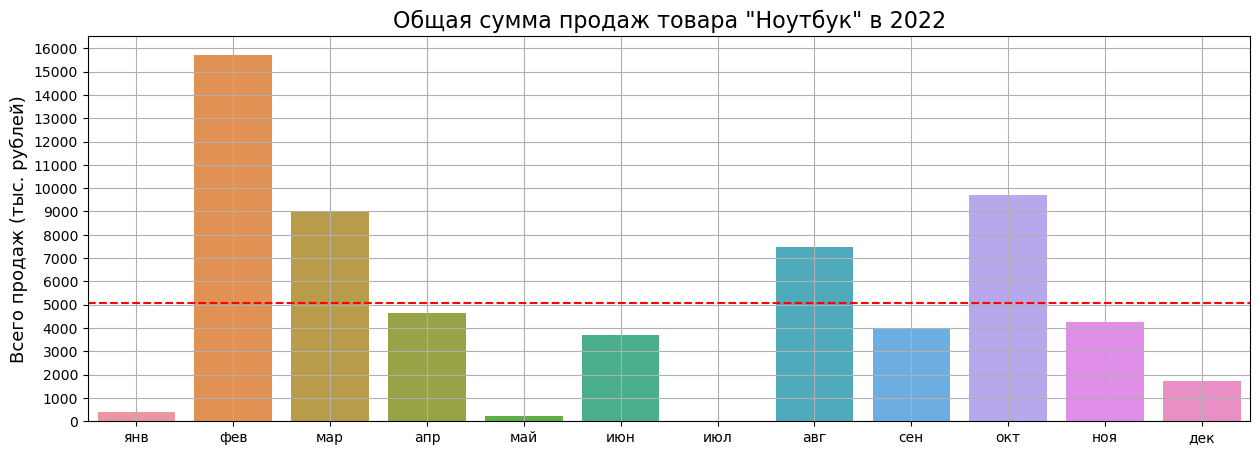

In [19]:
# рисуем столбчатый график с общей суммой продаж
fig, ax = plt.subplots()
sns.barplot(data=notebook_df_2022, y=notebook_df_2022.total_sales / 1000, x=notebook_df_2022.month)
# подписи по X
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(which='major') # сетка
# подписи месяцев
ax.set(xticklabels=['янв', 'фев', 'мар', "апр", "май", "июн", 
                    "июл", "авг", "сен", "окт", "ноя", "дек"])
# размеры рисунка
fig.set_figwidth(15) 
fig.set_figheight(5)
# подписи рисунка
plt.title('Общая сумма продаж товара "Ноутбук" в 2022', fontsize=16) 
plt.ylabel('Всего продаж (тыс. рублей)', fontsize=13)
plt.xlabel('')
# среднее
plt.axhline(y=notebook_df.total_sales.mean() / 1000, color='r', linestyle='--')
plt.show()

### Третье задание
3. Постройте модель прогнозирования количества продаж для любого товара (на выбор) на 1 год вперед. Опирайтесь только на исторические данные, предоставленные в файле. Любые внешние дополнительно внесенные данные должны быть обоснованы.

In [20]:
#убираю предупреждения
warnings.filterwarnings("ignore")

#### Обоснование добавления новых данных
Я не имею большое количество опыта в машинном обучении, но хорошо владею одним методом.
1. Берется выборка данных и делится на обучающую выборку и тестовую (для проверки).
2. На обучающей выборке модель тренируется.
3. На тестовой проверяется и сравнивается с реальными результатами.
<br>

Что сделаю я
<br>

1. Выборка делится на обучающую выборку с реальными данными и тестовую выборку (в нашем случае оттуда берутся только даты для предсказания)
2. На обучающей выборке модель также тренируется
3. А из тестовой выборки берутся даты и уже к этим датам модель предугадывает результаты
<br>

Для сравнения я привел в разделе "Тестирование" график за 2022 и предсказанный график для 2023

In [21]:
# для машинного обучения добавим 2023 год
# нас интересуют только даты, поэтому добавим туда данные за 2022
# эти данные не будут использоваться в обучении
for cnt in range(2, 14):
    #товар
    list_of_goods = data[0].dropna().to_list()
    list_of_goods = list_of_goods[1:]
    df2['goods'] = list_of_goods
    # цена
    list_of_prices = data[cnt].to_list()
    list_of_prices = list_of_prices[2:]
    list_of_prices = list_of_prices[::2]
    df2['price'] = list_of_prices
    # количество
    list_of_qty = data[cnt].to_list()
    list_of_qty = list_of_qty[2:]
    list_of_qty = list_of_qty[1::2]
    df2['qty'] = list_of_qty
    # месяц
    df2['month'] = cnt - 1
    # год
    df2['year'] = 2023
    # сохраняем
    df = pd.concat([df, df2])

In [22]:
# продажи за каждый месяц каждого года
df['total_sales'] = df['price'] * df['qty']

In [23]:
# возьмем наш датасет с продажей ноутбуков
df2 = df[df['goods'] == 'Фен']

In [24]:
df2.head(5)

,goods,price,qty,month,year,total_sales
0,Фен,5503,58,1,2022,319174
0,Фен,4300,78,2,2022,335400
0,Фен,5985,14,3,2022,83790
0,Фен,4205,64,4,2022,269120
0,Фен,5336,66,5,2022,352176


In [25]:
# добавим ему колонку даты и отсортируем по ней
df2['date'] = pd.to_datetime(df2[['year', 'month']].assign(DAY=1))
df2 = df2.sort_values(by='date')
df2 = df2.set_index('date')

In [26]:
df3 = df2['total_sales']

In [27]:
#создаю фунцию для признаков
def make_features(df, max_lag):
    data_new = df.copy()
    
    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data_new['total_sales'].shift(lag)
    
    
    return data_new   

In [28]:
df_new = make_features(df2, 12)

In [29]:
#удаляю строки с пропусками после сдвига и ненужные колонки
df_new = df_new.dropna()
df_new = df_new.drop(columns=['goods', 'price', 'qty'])

In [30]:
#определяю признаки и целевой признак
features = df_new.drop('total_sales', axis=1)
target = df_new['total_sales']

In [31]:
#разделим тестовую и обучающую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, shuffle=False)

In [32]:
#функция целевой метрики RMSE
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse ** 0.5

#задаем метрику качества для моделей
rmse_scorer = make_scorer(rmse, greater_is_better=False)

#### Catboost

In [33]:
model_cat = CatBoostRegressor()
cv_cat = TimeSeriesSplit(n_splits=5)
param_grid_cat = {'iterations': [100, 150, 200],
                'learning_rate': [0.12, 0.06, 0.03],
                'depth': [4, 6, 8]}
grid_model_cat = GridSearchCV(model_cat, param_grid_cat, cv=cv_cat, scoring=rmse_scorer)
grid_model_cat.fit(features_train, target_train)

0:	learn: 30486.1003577	total: 142ms	remaining: 14.1s
1:	learn: 29454.6932905	total: 143ms	remaining: 7s
2:	learn: 28571.0525115	total: 143ms	remaining: 4.63s
3:	learn: 27519.4489103	total: 144ms	remaining: 3.46s
4:	learn: 26693.8654614	total: 144ms	remaining: 2.74s
5:	learn: 25893.0495155	total: 145ms	remaining: 2.27s
6:	learn: 25116.2580474	total: 145ms	remaining: 1.93s
7:	learn: 24272.6181791	total: 145ms	remaining: 1.67s
8:	learn: 23544.4396500	total: 146ms	remaining: 1.47s
9:	learn: 22838.1064763	total: 146ms	remaining: 1.31s
10:	learn: 22152.9632974	total: 146ms	remaining: 1.18s
11:	learn: 21488.3744133	total: 147ms	remaining: 1.07s
12:	learn: 20802.9564642	total: 147ms	remaining: 982ms
13:	learn: 20107.0840621	total: 147ms	remaining: 903ms
14:	learn: 19503.8715538	total: 147ms	remaining: 834ms
15:	learn: 18918.7554202	total: 147ms	remaining: 774ms
16:	learn: 18351.1927703	total: 148ms	remaining: 722ms
17:	learn: 17800.6569995	total: 148ms	remaining: 674ms
18:	learn: 17158.936806

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A47AED2350>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 150, 200],
                         'learning_rate': [0.12, 0.06, 0.03]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [34]:
best_model_cat = grid_model_cat.best_estimator_

#### Тестирование

In [35]:
pred_cat = best_model_cat.predict(features_test)
score_cat = rmse(target_test, pred_cat)
print('RMSE модели', score_cat)

RMSE модели 104697.48450819441


In [36]:
# датасет для визуализации
df4 = pd.DataFrame(pred_cat, columns=['предсказания'])
df4.index = target_test.index

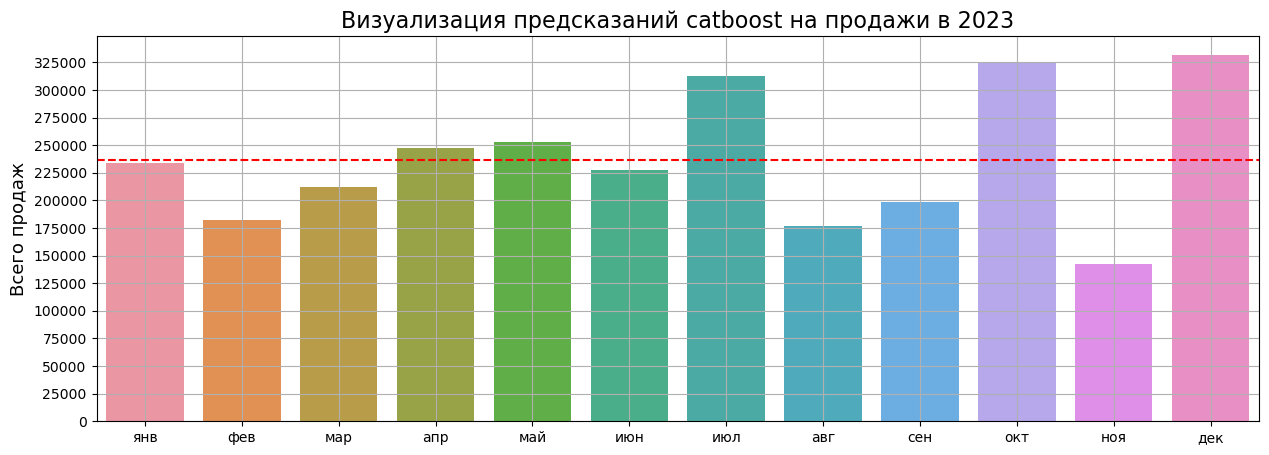

In [37]:
# визуализирую предсказания
fig, ax = plt.subplots()
sns.barplot(data=df4, x=df4.index, y=df4['предсказания'])
# подписи по X Y
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000))
ax.set(xticklabels=['янв', 'фев', 'мар', "апр", "май", "июн", 
                    "июл", "авг", "сен", "окт", "ноя", "дек"])
# размеры рисунка
fig.set_figwidth(15) 
fig.set_figheight(5)
plt.grid()
# подписи рисунка
plt.title('Визуализация предсказаний catboost на продажи в 2023', fontsize=16) 
plt.ylabel('Всего продаж', fontsize=13)
plt.xlabel('')
# среднее
plt.axhline(y=df4['предсказания'].mean(), color='r', linestyle='--')
plt.show()

In [38]:
fan_df = df[(df['goods'] == 'Фен') & (df['year'] == 2022)]

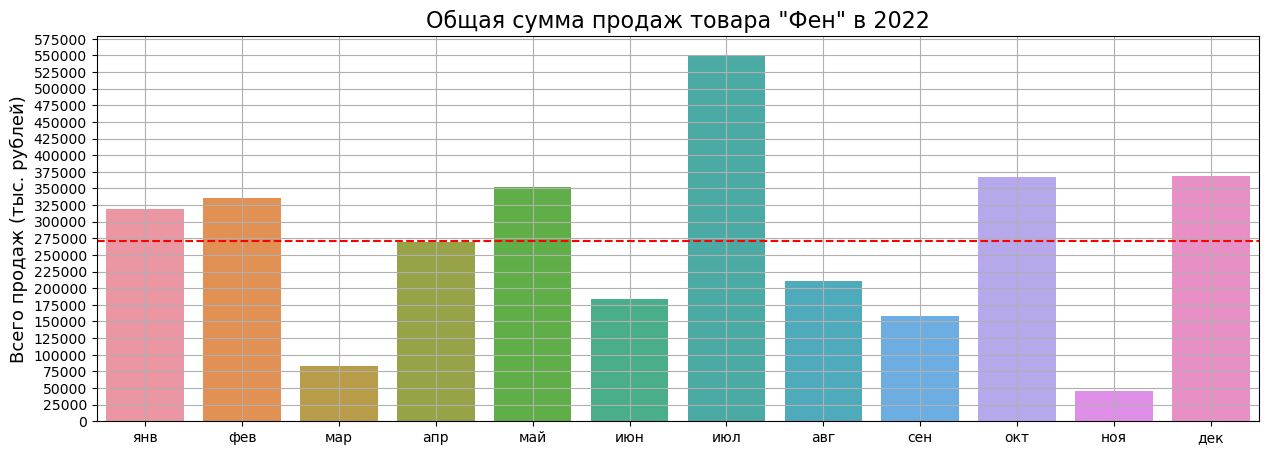

In [39]:
# рисуем столбчатый график с общей суммой продаж
fig, ax = plt.subplots()
sns.barplot(data=fan_df, y=fan_df.total_sales, x=fan_df.month)
# подписи по X
ax.grid(which='major') # сетка
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000))
# подписи месяцев
ax.set(xticklabels=['янв', 'фев', 'мар', "апр", "май", "июн", 
                    "июл", "авг", "сен", "окт", "ноя", "дек"])
# размеры рисунка
fig.set_figwidth(15) 
fig.set_figheight(5)
# подписи рисунка
plt.title('Общая сумма продаж товара "Фен" в 2022', fontsize=16) 
plt.ylabel('Всего продаж (тыс. рублей)', fontsize=13)
plt.xlabel('')
# среднее
plt.axhline(y=fan_df.total_sales.mean(), color='r', linestyle='--')
plt.show()